<a href="https://colab.research.google.com/github/AnweshaC21/Computer-Vision-and-Image-Processing/blob/main/2_Affine_Transformations_on_Image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The input image 'img' is taken and 4 types of affine transformations are applied on it:

1. Translation
2. Rotation
3. Scaling
4. Shearing

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
# read the image (from google drive)
from google.colab import drive
drive.mount('/content/gdrive')

img = cv2.imread("/content/gdrive/MyDrive/Datasets/greyscaleimage2.png")

Mounted at /content/gdrive


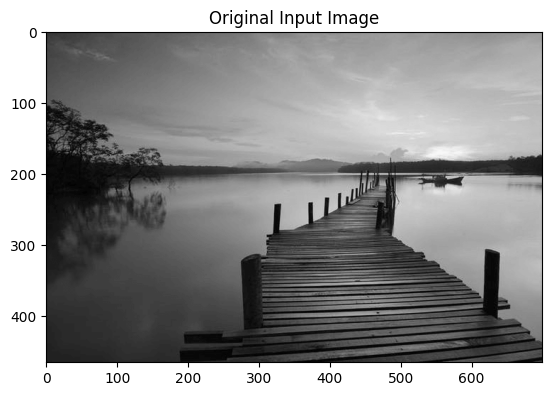

In [ ]:
# display the image 
plt.imshow(img)
plt.title("Original Input Image")
plt.show()

###Translation

In [ ]:
# (1) Translation
h = 500
k = 150

# The image is to be translated to 500 units (h) along x-axis and 150 units (k) along y-axis

In [ ]:
x,y,z = img.shape
print(x, y)

466 700


In [ ]:
# An empty image 'new_img' is created where the pixels of the translated image is later copied
# Size of the new image is ((x+h),(y+k))

new_img = np.zeros([x+h, y+k, z])

for i in range(0,x+h):
  for j in range(0,y+k):
      new_img[i,j] = [255,255,255]

In [ ]:
for i in range(0,x):
  for j in range(0,y):
      new_img[i+h,j+k] = img[i,j]

# The pixel value of the point (x,y) of original image is copied to the point (x+h,y+k) of new image

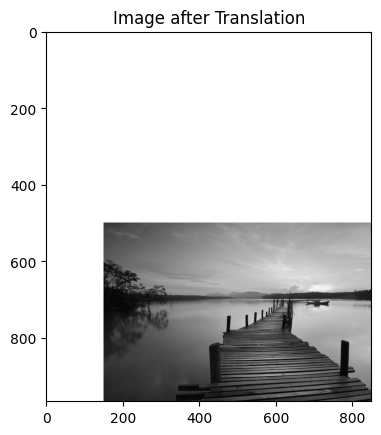

In [ ]:
plt.imshow(new_img/255)
plt.title("Image after Translation")
plt.show()

The image is translated h units along x direction and k units along y direction. First, an empty image of size (x+h, y+k) is created having all pixels white [255,255,255]. Then each of the pixel values (x,y) of original image is copied to the pixel (x+h,y+k) of new image. Hence, translation is achieved.

###Rotation

In [ ]:
# (2) Rotation
t = (60 * np.pi / 180)

# The original input image is to be rotated 60 degrees anticlockwise

In [ ]:
x,y,z = img.shape
print(img.shape)

(466, 700, 3)


In [ ]:
diag = 2 * int(np.sqrt(x*x + y*y)) + 500    # considering max length and zero-padding
print(diag)

2180


In [ ]:
# An empty image is created of enough size so that the image stays intact after rotation

new_img = np.zeros([diag, diag, z])

for i in range(0, diag):
  for j in range(0, diag):
      new_img[i,j] = [255,255,255]

In [ ]:
new_img.shape

(2180, 2180, 3)

In [ ]:
h=int((diag-x)/2)
k=int((diag-y)/2)

# translating the image so that the resultant image after rotation stays intact

In [ ]:
# (x,y) <-> (x_,y_) mapping

for i in range(x):
  for j in range(y):
    x_ = int(((i) * np.cos(t) - (j) * np.sin(t)) + h)
    y_ = int(((i) * np.sin(t) + (j) * np.cos(t)) + k)
    new_img[x_,y_] = img[i,j]

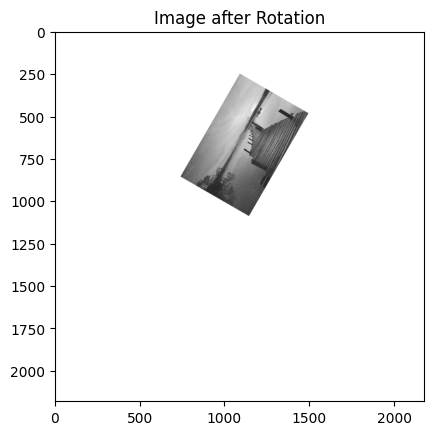

In [ ]:
plt.imshow(new_img/255)
plt.title("Image after Rotation")
plt.show()

The original input image is rotated to the given angle in the anti-clockwise direction. Then it is translated and zero-padding is applied, to display the image in intact form. Hence, rotation is achieved.

###Scaling

In [ ]:
# (3) Scaling
cx = 3
cy = 2/3

# The original input image is to be scaled to 3 times along x-direction, and upto 2/3 times along the y-direction

In [ ]:
x,y,z = img.shape

In [ ]:
# Size of output image will be cx (scale along x) times x units, and cy (scale along y) times y units

x_ = int(cx*x)
y_ = int(cy*y)

new_img = np.zeros([x_, y_, z])

for i in range(0,x_):
  for j in range(0,y_):
      new_img[i,j] = [255,255,255]

In [ ]:
for i in range(0,x_):
  for j in range(0,y_):
      new_img[i,j] = img[int(i//cx), int(j//cy)]

# The pixel value of the point (x,y) of original image is mapped to the point (x//cx,y//cy) of new image

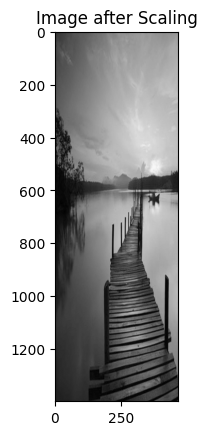

In [ ]:
plt.imshow(new_img/255)
plt.title("Image after Scaling")
plt.show()

The original input image is scaled along both x and y directions as per the given scaling factors. Hence, image scaling is achieved.

###Shearing

In [ ]:
# (4) Shearing
sx = 0.5
sy = 0.8

# The input image is to be sheared
# The shearing factor along x-direction is 0.5 and along y-direction is 0.8

In [ ]:
x,y,z = img.shape

In [ ]:
max = x+y   # max length

In [ ]:
new_img = np.zeros([max, max, z])

for i in range(0, max):
  for j in range(0, max):
      new_img[i,j] = [255,255,255]

# an empty image is created having maximum possible length and breadth (x+y, x+y)

In [ ]:
# (x,y) <-> (x_,y_) mapping

for i in range(x):
  for j in range(y):
    x_ = int(i + sx*j)
    y_ = int(sy*i + j)
    new_img[x_,y_] = img[i,j]

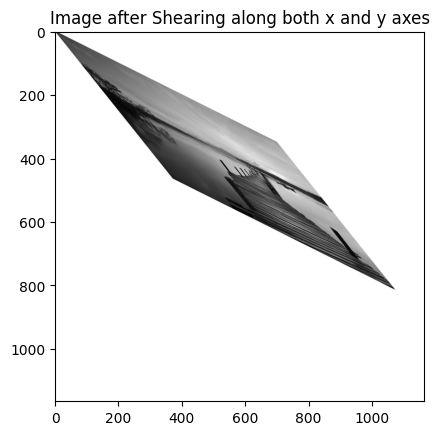

In [ ]:
plt.imshow(new_img/255)
plt.title("Image after Shearing along both x and y axes")
plt.show()

The original input image is sheared twice, once along x-direction by the shearing factor 0.5, then along the y-direction by the shearing factor 0.8. Hence, shearing of input image is achieved.